<a href="https://colab.research.google.com/github/justlab11/MLTSA22_JLabombard/blob/main/HW6/HW6_JLabombard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

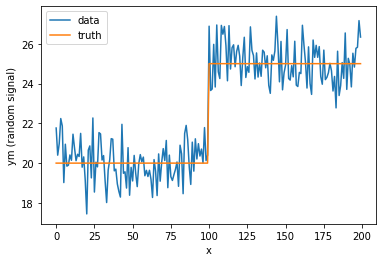

In [63]:
mu1, mu2 = 20, 25
x = np.arange(200)
np.random.seed(0)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("ym (random signal)");
pl.legend();

Figure 1: Synthetic data with obvious point of change in blue. In orange is the point of change and the means of the sections. The change in the mean clearly displays the POC (vertical line at 100).

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [25]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(y[i:]) -  f(y[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(y[:i]), f(y[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 20.06, mean after: 25.08


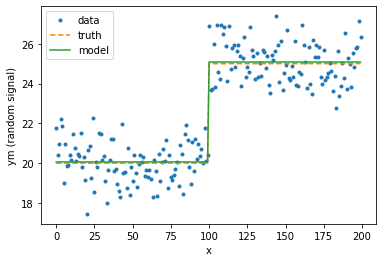

In [64]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel("ym (random signal)");
pl.legend();

Figure 2: Same as Figure 1, but now includes a green plot of a model used to predict the POC. The model relies on finding the largest change in the mean before and after the POC. The model correctly locates the POC and is close to both of the means.

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa22_6#/6/2) a single POC and maximizing the difference in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [27]:
def poc_mse(y: np.ndarray)->tuple:
  """
  Parameters:
    - y (np.ndarray): the signal that contains a POC
  Returns:
    - tuple(poc, before, after)
      = poc (int): the index of the POC
      = before (np.float64): the mean before the POC
      = after (np.float64): the mean after the POC
  """
  N = len(y)
  f = np.nanmean
  poc, diff, before, after = 0, 0, np.nan, np.nan
  for i in range(1, N):
      diff_here = np.abs(f(y[i:]) -  f(y[:i]))**2
      if diff < diff_here:
          diff = diff_here
          poc = i
          before, after = f(y[:i]), f(y[i:])
  return(poc, before, after)

In [28]:
print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))

poc: 100.00, mean before: 20.06, mean after: 25.08


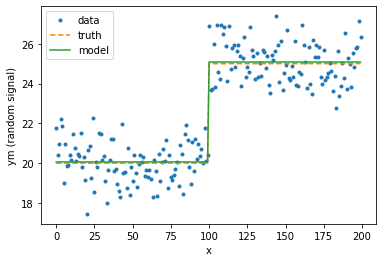

In [65]:
poc, before, after = poc_mse(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel("ym (random signal)");
pl.legend();

Figure 3: Same as Figure 2, but with a different cost function. This cost function relies on minimizing the squared error between both sections.

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function should still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [30]:
mu1, mu2 = 20, 25
s2 = 4
ys = np.concatenate([np.random.randn(100)  + mu1 , np.random.randn(100) * s2 + mu1])

In [31]:
def maxdiff(y, sigma=False):
    N = len(y)
    f = np.nanstd if sigma else np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(y[i:]) -  f(y[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(y[:i]), f(y[i:])
    return(poc, before, after)  
print("poc: {:.2f}, standard deviation before: {:.2f}, standard deviation after: {:.2f}".format(*maxdiff(ys, 
                                                                    sigma=True)))



poc: 100.00, standard deviation before: 0.95, standard deviation after: 3.72


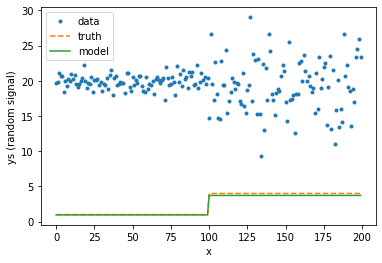

In [66]:
poc, before, after = maxdiff(ys, sigma=True)   
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [1] * 100 + [4] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ys) - poc), label="model")
pl.xlabel('x')
pl.ylabel("ys (random signal)")
pl.legend();

Figure 4: Plot of the POC using the change in standard deviation instead of the mean. The model (in green) is very similar to the truth (in yellow).

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

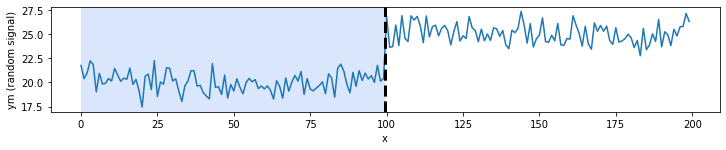

In [68]:
# detection
algo = rpt.Pelt(model="l2").fit(ym)
result = algo.predict(pen=12)

# display
rpt.display(ym, [100], result)
pl.ylabel("ym (random signal)")
pl.xlabel("x")
pl.show()

Figure 5: POC detection using rapture on ym (the first synthetic signal). I used L2 to look at the mean squared error for each section. I used a penalty value of 12 because it produced the best result. The POC aligns exactly with the expected POC.

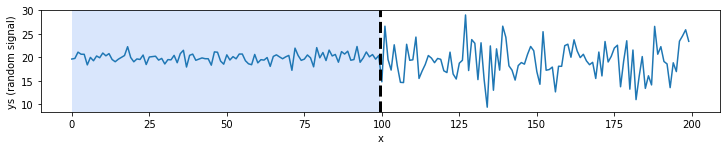

In [69]:
# detection
algo = rpt.Pelt(model="rbf").fit(ys)
result = algo.predict(pen=10)

# display
rpt.display(ys, [100], result)
pl.ylabel("ys (random signal)")
pl.xlabel("x")
pl.show()

Figure 6: POC detection using rapture on ys (the second synthetic signal). I used ranked-based detection because it does not look at the mean to find POC. Penalty value of 10 was used due to the best result.

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [35]:
eq1 = pd.read_csv("http://fbb.space/mltsa/LALNeq.csv")
eq1 = eq1.iloc[: , 1:]
eq1.describe()

,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06
mean,4.616407e+00,8.852012e-01
std,2.614006e+01,3.374432e-01
min,-4.621000e+03,3.008971e-01
25%,2.000000e+00,5.934956e-01
50%,5.000000e+00,8.849986e-01
75%,7.000000e+00,1.177597e+00
max,3.252000e+03,1.469100e+00


In [36]:
eq1.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [37]:
eq1.tail()

,acoustic_data,time_to_failure
4499995,4,0.300897
4499996,6,0.300897
4499997,1,0.300897
4499998,3,0.300897
4499999,4,0.300897


# using rupture

Go through the documentation of rupture. 

Look at the "cost functions" and "search methos" tab here - https://centre-borelli.github.io/ruptures-docs/user-guide/ and the paper https://arxiv.org/pdf/1801.00718.pdf to find the computational cost associate to each method (Section 5).

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




Look at the "cost functions" and "search methos" tab here - https://centre-borelli.github.io/ruptures-docs/user-guide/ and the paper https://arxiv.org/pdf/1801.00718.pdf to find the computational cost associate to each method.





In [38]:
eq1_10k = eq1.acoustic_data.values[:10000]
eq1_5k = eq1.acoustic_data.values[:5000]
eq1_1k = eq1.acoustic_data.values[:1000]

POC at 4900


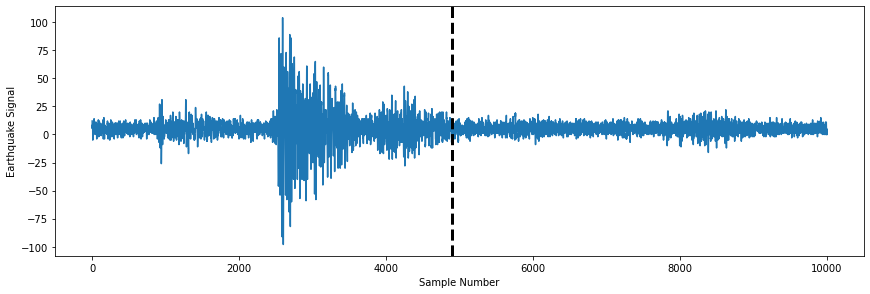

In [61]:
algo1 = rpt.Dynp(model="rbf", jump=100).fit(eq1_10k)
result = algo1.predict(n_bkps=1)

print(f"POC at {result[0]}")
rpt.display(eq1_10k, [], result, figsize=(12, 4))
pl.xlabel("Sample Number")
pl.ylabel("Earthquake Signal")
pl.show()

Figure 7: POC detection using dynamic programming. The detection was applied to the first 10k points of earthquake data and only looked for 1 POC. Rank-based detection was used again due to looking at shifts in variance. There is a point of change located at 4900.

Dynamic programming has a complexity of O(kN^2). The algorithm works by:
  * Finds the minimum sum of costs by computing all costs and finding the minimum. Uses dynamic programming to perform this operation.

POCs at 2500, 3500


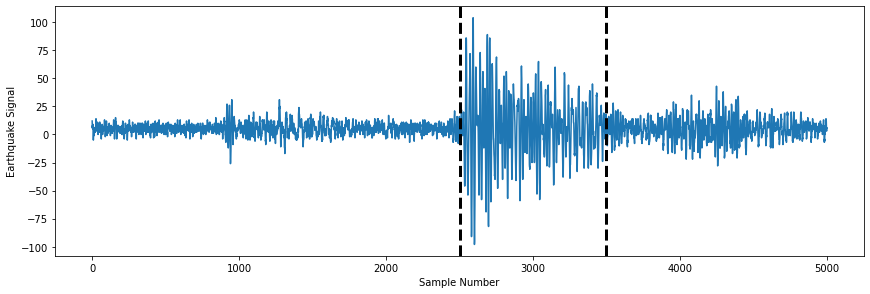

In [60]:
algo2 = rpt.Dynp(model="rbf", jump=100).fit(eq1_5k)
result = algo2.predict(n_bkps=2)

print(f"POCs at {result[0]}, {result[1]}")
rpt.display(eq1_5k, [], result, figsize=(12, 4))
pl.xlabel("Sample Number")
pl.ylabel("Earthquake Signal")
pl.show()

Figure 8: Same as Figure 7, but only looking at the first 5k samples and looking for 2 POCs. It is clear to see that the black dotted lines are where there is the most significant change in the data.

Something interesting: The POC found for 10k is not found for 5k. The POC found previously was at 4900 which is in the range for 5k.

POCs at 895, 905, 970


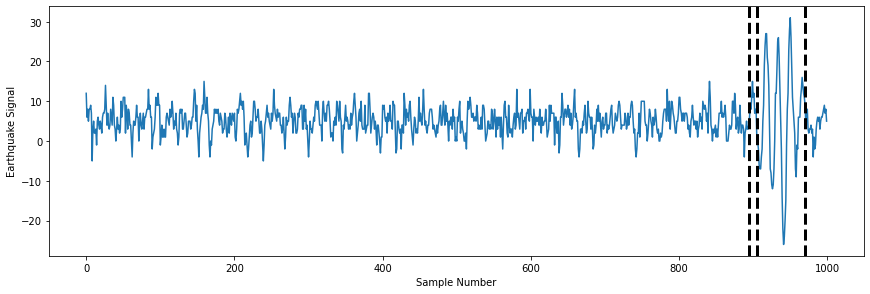

In [59]:
algo3 = rpt.Dynp(model="rbf").fit(eq1_1k)
result = algo3.predict(n_bkps=3)

print(f"POCs at {result[0]}, {result[1]}, {result[2]}")
rpt.display(eq1_1k, [], result, figsize=(12, 4))
pl.xlabel("Sample Number")
pl.ylabel("Earthquake Signal")
pl.show()

Figure 9: Same as Figure 7, but only looking at the first 1k samples and looking for 3 POCs. It is clear to see that the black dotted lines are at the most significant changes in the plot.

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

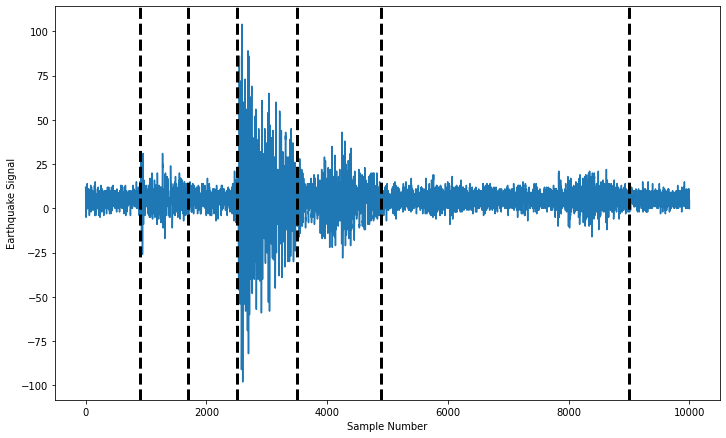

In [58]:
# detection
algo = rpt.Binseg(model="rbf", jump=100).fit(eq1_10k)
result = algo.predict(n_bkps=6)

# display
# rpt.show.display(eq1_10k, result, figsize=(10, 6))
# pl.show()
rpt.display(eq1_10k, [], result, figsize=(10, 6))
pl.xlabel("Sample Number")
pl.ylabel("Earthquake Signal")
pl.show()

Figure 10: POC detection on the first 10k samples using binary segmentation. It looks for 6 POCs. It shows the largest points of change with the black dotted lines. I continued to use the rank-based detection since it has functioned well. I used jump=100 in order to speed up the runtime.

Binary Segmetation has a complexity of O(Nlog(N)). The algorithm works by:
  1. Searches for POC by finding the smalled sum of costs.
  2. Splits the signal at the POC.
  3. Repeats the process with the new subsignals until the criterion is met.